## Libraries

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import folium

## Dataset Importing

In [2]:
data = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


## Checking Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [4]:
data.shape

(11124, 16)

In [5]:
data.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

## Changing date type

In [6]:
data["date_of_event"] = pd.to_datetime(data["date_of_event"])
data["date_of_death"] = pd.to_datetime(data["date_of_death"])

## Filling Missing values

In [7]:
data["ammunition"].unique()

array(['live ammunition', 'missile', nan, 'rocket',
       '0.22-caliber bullets', 'bomb', 'knife', 'shell', 'rock',
       'rubber-coated metal bullets', 'stun grenade', 'teargas canister',
       'flare bomb', 'sponge rounds', 'mortar fire', 'grad rocket',
       'flechette shells', 'phosphorus shell', 'Qassam rocket',
       'explosive belt', 'grenade', 'car bomb'], dtype=object)

In [8]:
data["ammunition"].value_counts()

missile                        2877
live ammunition                1514
shell                           675
explosive belt                  326
bomb                            249
mortar fire                      51
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: ammunition, dtype: int64

In [9]:
data["ammunition"].fillna("missile",inplace=True)

In [10]:
data["ammunition"].isnull().sum()

0

In [11]:
data["took_part_in_the_hostilities"].value_counts()

No                            4653
Yes                           3467
Israelis                       771
Unknown                        603
Object of targeted killing     200
Name: took_part_in_the_hostilities, dtype: int64

In [12]:
data["took_part_in_the_hostilities"].fillna("No",inplace=True)

In [13]:
data["took_part_in_the_hostilities"].isnull().sum()

0

In [14]:
data.dropna(axis=0,inplace=True)

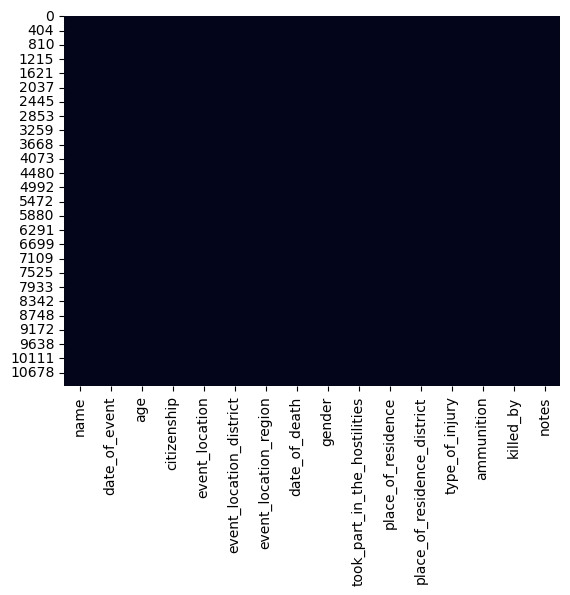

In [15]:
import seaborn as sns

sns.heatmap(data.isnull(),cbar=False)
plt.show()

# EDA

## Fatality Trends from 2000 to 2023

In [16]:
deaths_per_year = data["date_of_death"].dt.year.value_counts().sort_index()
deaths_per_year.index = deaths_per_year.index.astype(int) 
deaths_per_year

2000      32
2001     294
2002    1045
2003     680
2004     910
2005     237
2006     660
2007     395
2008     887
2009     866
2010      88
2011     127
2012     261
2013      41
2014    2287
2015     174
2016     116
2017      80
2018     300
2019     144
2020      31
2021     320
2022     205
2023     248
Name: date_of_death, dtype: int64

In [17]:
years = deaths_per_year.index.to_list()
deaths_count = deaths_per_year.values.tolist()

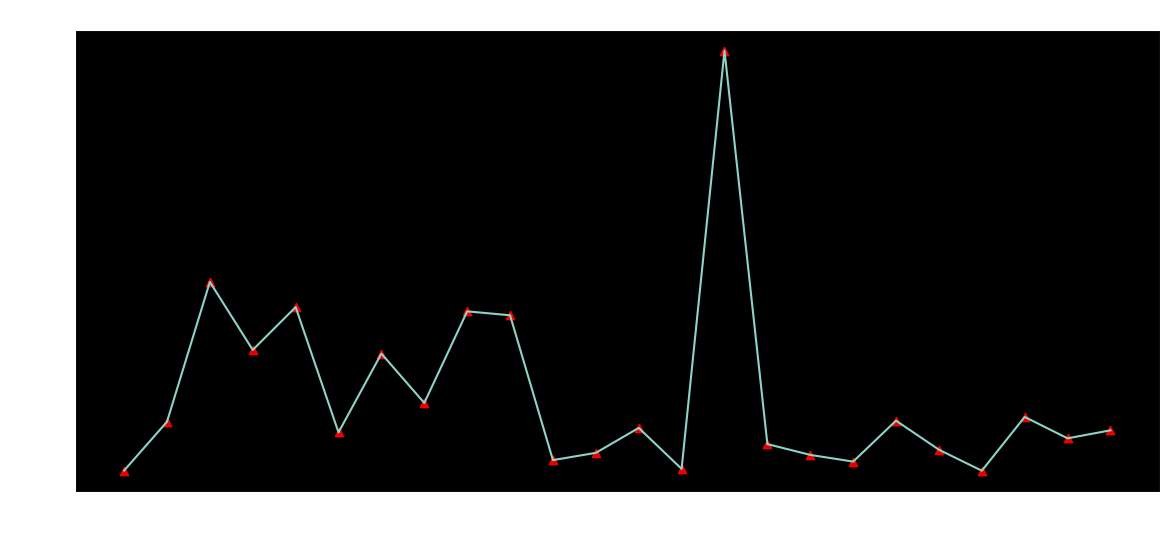

In [18]:
plt.figure(figsize=(14,6))
plt.style.use('dark_background')

plt.plot(years,deaths_count)


#scater
plt.scatter(years,deaths_count,alpha = 0.9,marker = '^',color = 'red')

plt.title("Fatality Trends from 2000 to 2023")
plt.xlabel("Years")
plt.ylabel("Deaths")

plt.show()

# Max Deaths Year

In [19]:
max_deaths = years[deaths_count.index(max(deaths_count))]
max_deaths

2014

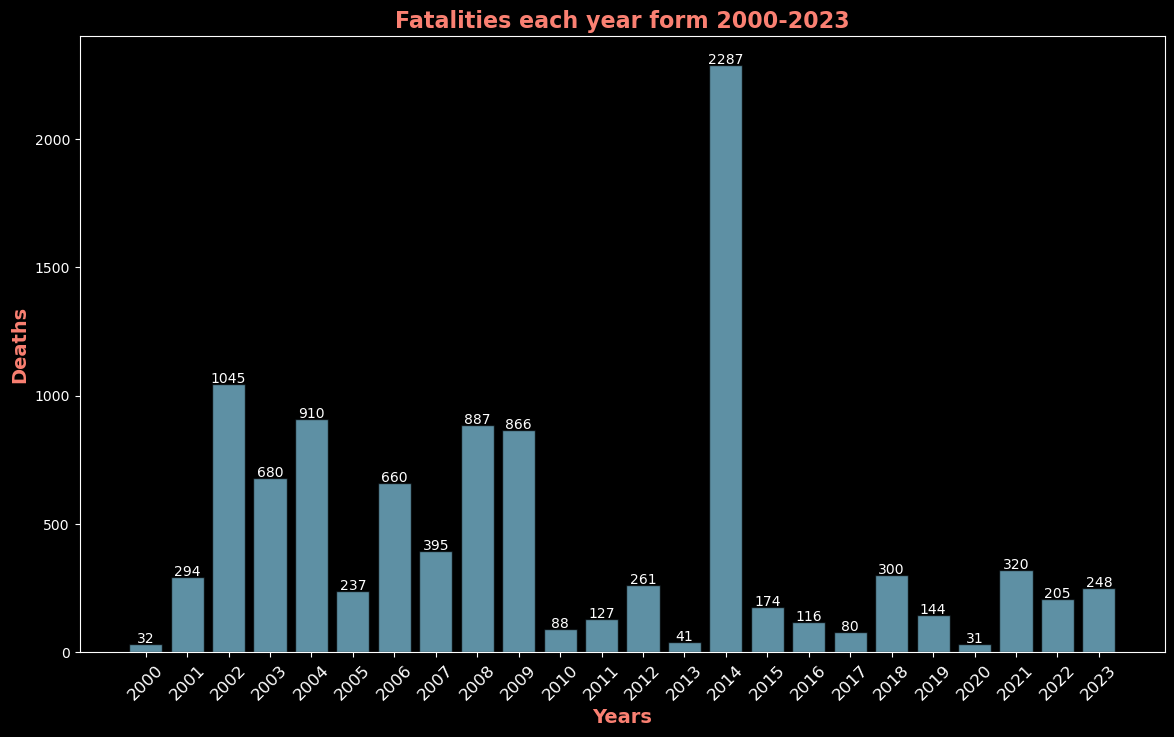

In [20]:
plt.figure(figsize=(14,8))
plt.style.use('dark_background')

plt.bar(years,deaths_count,color='skyblue',alpha=0.7,edgecolor='black')
plt.title("Fatalities each year form 2000-2023",fontsize=16,color = "salmon",weight='bold')
plt.xlabel("Years",fontsize=14,color = "salmon",weight='bold')
plt.ylabel("Deaths",fontsize=14,color = "salmon",weight='bold')
plt.xticks(fontsize=12,rotation=45)
plt.yticks()

plt.xticks(range(2000,2024,1))
#plt.yticks(range(0,2400,100))


for years, count in zip(years,deaths_count):
    plt.text(years, count + 5 , str(count), ha= "center")    


ax=plt.gca()
ax.set_facecolor=('f7f7f7')

plt.show()

#### The graph above depicts the trends in fatalities from the year 2000 to 2023:

    There was a significant spike in fatalities around the year 2002.
    A decline in fatalities was observed after 2002, reaching a low point around 2005.
    From 2005 to 2008, there was another increase in fatalities.
    After 2008, the fatalities decreased and remained relatively stable until around 2013.
    In 2014 a significant rise in deaths count the max fatalities in this year
    From 2018 to 2023, we see a gradual increase in the number of fatalities.

In [21]:
data.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

# Citizenship wise Fatalities

In [22]:
data['citizenship'].value_counts()

Palestinian    9442
Israeli         983
Jordanian         2
American          1
Name: citizenship, dtype: int64

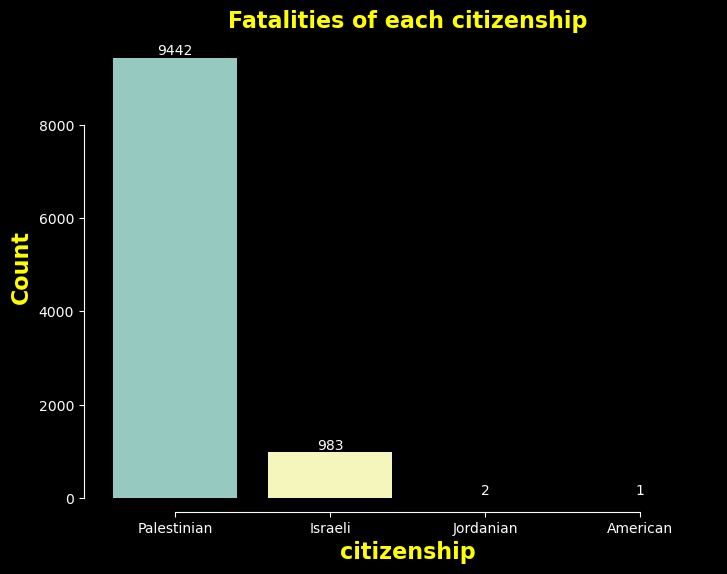

In [23]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="citizenship",data=data)
sns.despine()
sns.despine(offset=10,trim=True)
sns.set_palette("bright")
plt.title("Fatalities of each citizenship",weight='bold',fontsize=16,color="yellow")
plt.xlabel("citizenship",weight='bold',fontsize=16,color="yellow")
plt.ylabel("Count",weight='bold',fontsize=16,color="yellow")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Above Graph shows:
    Most people were killed in Palestine
    

# To whom people were killed

In [24]:
data["killed_by"].unique()

array(['Israeli security forces', 'Palestinian civilians',
       'Israeli civilians'], dtype=object)

In [25]:
data["killed_by"].value_counts()

Israeli security forces    9356
Palestinian civilians       982
Israeli civilians            90
Name: killed_by, dtype: int64

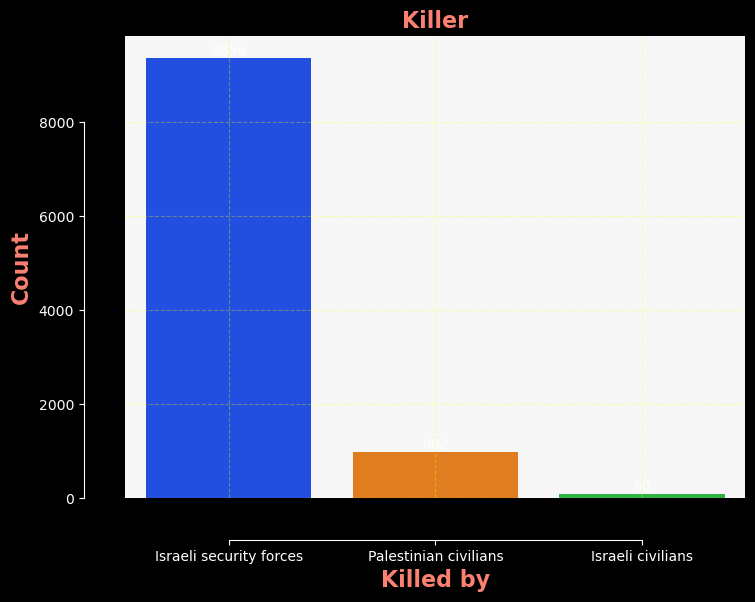

In [26]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="killed_by",data=data)
sns.despine()
sns.despine(offset=30,trim=True)
sns.set_palette("bright")
plt.title("Killer",weight='bold',fontsize=16,color="salmon")
plt.xlabel("Killed by",weight='bold',fontsize=16,color="salmon")
plt.ylabel("Count",weight='bold',fontsize=16,color="salmon")
plt.grid(True,linestyle="--",alpha=0.3,color='yellow')

for i in ax.containers:
    ax.bar_label(i,)
    
ax = plt.gca()
ax.set_facecolor("#f7f7f7")


plt.show()

### Graph shows:
##### Most people were Killed by Israeli Security Forces

# Which ammunition were mostly used to killed people

In [27]:
ammunition = data["ammunition"].value_counts()

ammunition = ammunition[ammunition > 50]

In [28]:
ammunition

missile            7498
live ammunition    1490
shell               655
explosive belt      319
bomb                244
mortar fire          51
Name: ammunition, dtype: int64

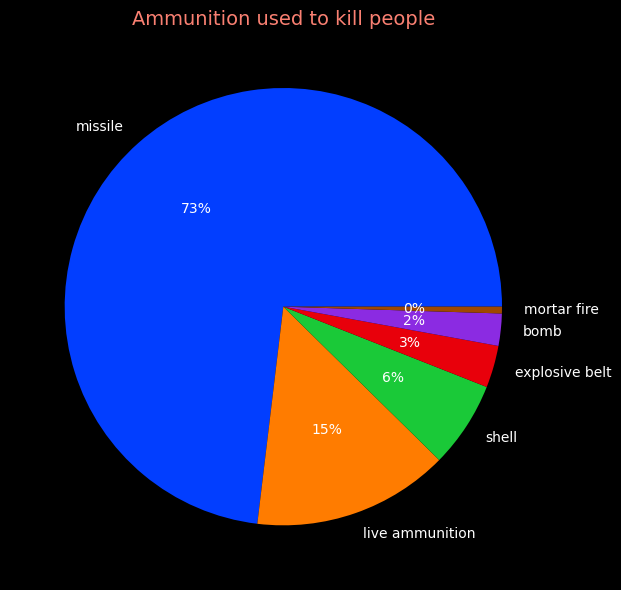

In [29]:
plt.figure(figsize=(8,6))

plt.pie(ammunition,labels=ammunition.index,autopct="%1.f%%")
plt.title("Ammunition used to kill people",color='salmon',fontsize=14)
plt.tight_layout()
plt.show()

### Chart shows that:
#### 74% people were killed by Missile
#### 14%  people were killed by Live Ammunation
#### 6%  people were killed by Shell

# Age Distribution

In [30]:
data['age']

0        32.0
1        21.0
2        16.0
3        19.0
4        15.0
         ... 
11118    25.0
11119    64.0
11120    28.0
11121    36.0
11122    21.0
Name: age, Length: 10428, dtype: float64

In [31]:
age = data['age'].value_counts()
age = age[age>107]
age

22.0    596
21.0    571
20.0    562
23.0    544
19.0    505
25.0    460
24.0    453
17.0    391
18.0    373
16.0    369
26.0    366
27.0    327
28.0    297
15.0    266
30.0    253
29.0    215
32.0    196
14.0    195
33.0    167
31.0    160
35.0    143
13.0    143
34.0    137
36.0    123
Name: age, dtype: int64

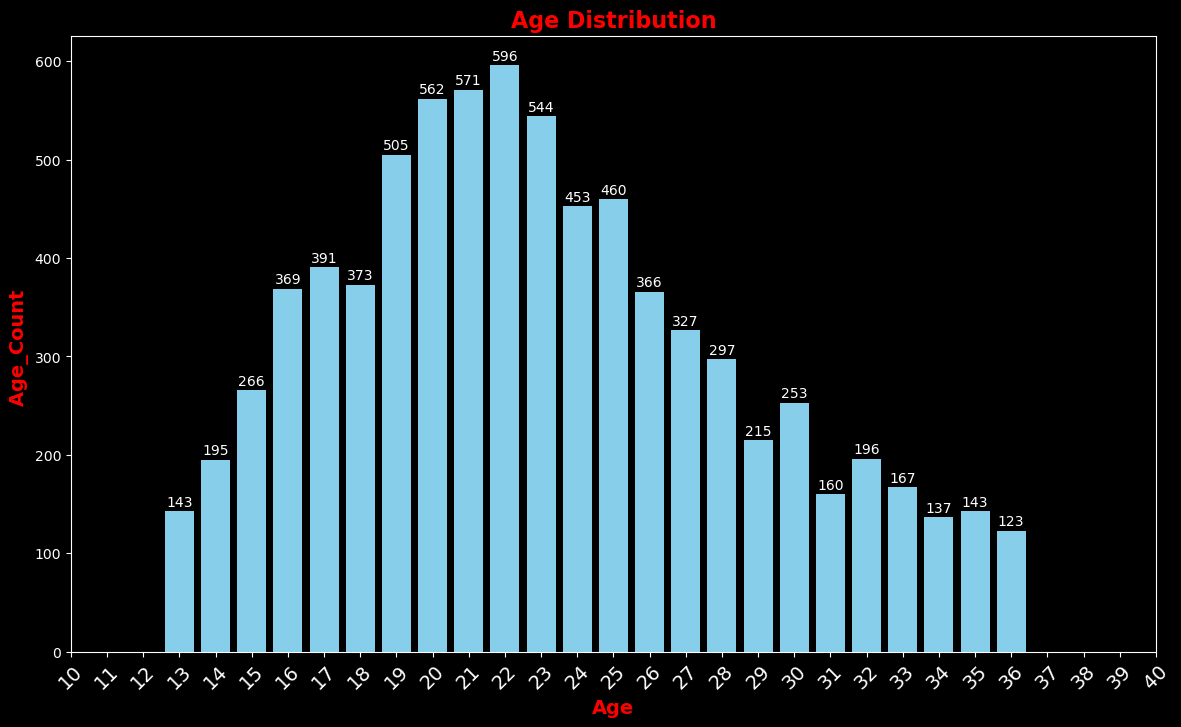

In [32]:
plt.figure(figsize=(14,8))

plt.bar(age.index,age.values,color="skyblue")
plt.title("Age Distribution",color="red",fontsize=16,weight='bold')
plt.ylabel("Age_Count ",color="red",fontsize=14,weight='bold')
plt.xlabel("Age",color="red",fontsize=14,weight='bold')
plt.xticks(range(10,41,1),rotation=45,fontsize=14)

for age, count in zip(age.index,age.values):
    plt.text(age, count + 5 , str(count), ha= "center")
    


plt.show()

### Graph shows:
   #### Max people died were the age of 22 years
   #### And Mostly people died between the age of 19 years to 25 years

# Gender Count

In [33]:
data['gender'].value_counts()

M    9074
F    1354
Name: gender, dtype: int64

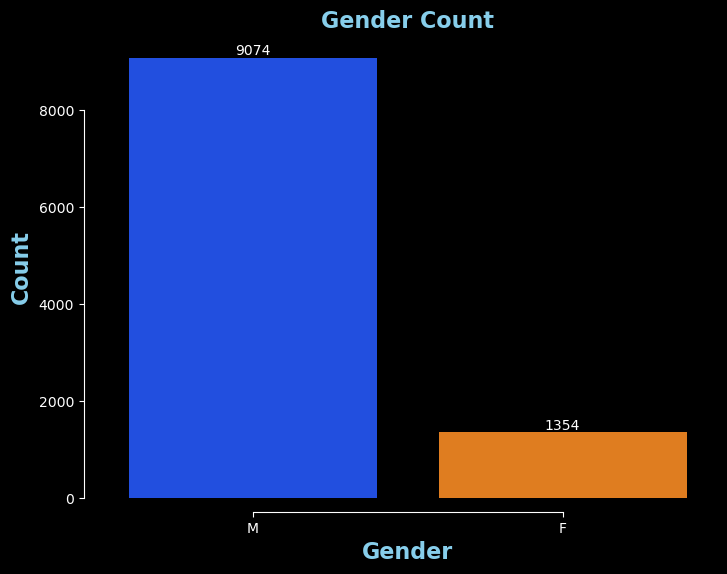

In [34]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x=data['gender'],data=data)
sns.despine()
sns.despine(offset=10,trim=True)
sns.set_palette("bright")
plt.title("Gender Count",weight='bold',fontsize=16,color="skyblue")
plt.xlabel("Gender",weight='bold',fontsize=16,color="skyblue")
plt.ylabel("Count",weight='bold',fontsize=16,color="skyblue")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Maximum people killed were Men

# Most words used in reporting

In [35]:
note = data['notes']
note

0        Fatally shot by Israeli forces while standing ...
1        Fatally shot by Israeli forces while trying to...
2        Fatally shot by soldiers while firing at them ...
3        Shot in the head by Israeli forces while throw...
4        Wounded by soldiers’ gunfire after running awa...
                               ...                        
11118                 His body was found burnt in his car.
11119                    Killed while hiking on Mt. Eival.
11120    Killed by a settler from Itamar while harvesti...
11121       His body was found a day after he disappeared.
11122     Killed by settlers who rioted in Biddya village.
Name: notes, Length: 10428, dtype: object

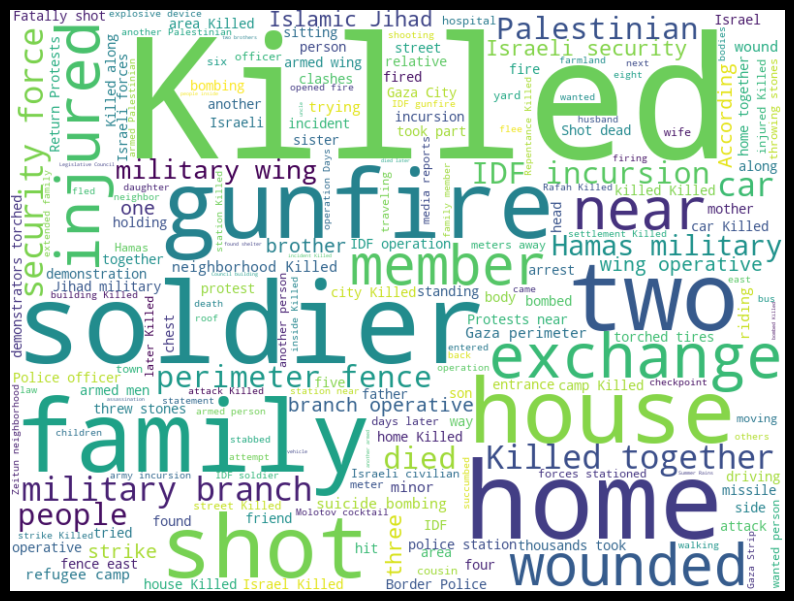

In [36]:
from wordcloud import WordCloud

notes = " ".join(note)

cloud = WordCloud(width=800,height=600,background_color='white').generate(notes)

plt.figure(figsize=(10,8))
plt.imshow(cloud,interpolation='bilinear')

plt.axis('off')

plt.show()

# Places on Map Based on Fatalities

In [37]:
#Redefining the approximate coordinates for major districts
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

# Get fatality counts for each district
district_fatalities = data.groupby('event_location_district').size()

# Function to determine the color of the circle based on the number of fatalities
def get_color(fatalities):
    if fatalities > 500:
        return 'darkred'
    elif fatalities > 100:
        return 'red'
    elif fatalities > 50:
        return 'orange'
    else:
        return 'green'

# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8)

# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(location=coords,tooltip=f'{district}: {fatalities} fatalities',icon=None).add_to(m)
    folium.Circle(location=coords,  # scale radius for better visualization
    color=get_color(fatalities),fill=True,fill_color=get_color(fatalities),fill_opacity=0.6).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m.save("m.html")